In [1]:
import joblib

In [2]:
lats = joblib.load('/home/dkhodakov/lats.jl')

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import seaborn as sns
import os
import subprocess
import pandas as pd
import time
import seaborn as sns
sns.set(style='whitegrid')


In [5]:
def results(lats: list) -> pd.DataFrame:
    df = pd.concat(lats)
    df = df[df[0.99] < 200]
    df = df.groupby(['exp_name', 'rps']).mean().sort_values(0.98).round(2)
    df = df.reset_index()
    renamer = {
        0.95: '95% ms',
        0.98: '98% ms',
        0.99: '99% ms',
    }
    df = df.rename(renamer, axis=1)
    return df

In [6]:
bar_color = '#e5cbb7'
bars = ['95% ms', '98% ms', '99% ms']

In [12]:
bars

['95% ms', '98% ms', '99% ms']

In [10]:
res = results(lats)
res = res[~res.exp_name.str.contains('hardwork')]
res.style.bar(subset=bars, color=bar_color)

level_1,exp_name,rps,95% ms,98% ms,99% ms
0,aiohttp,1000,51.5,51.6,51.63
1,aiohttp,1500,51.2,52.33,54.13
2,tornado_async,1000,51.8,52.37,53.57
3,tornado_oldstyle,1000,51.9,52.47,53.53
4,aiohttp,2000,51.93,55.33,59.97
5,tornado_async,1200,54.2,56.97,58.8
6,aiohttp,2500,54.37,58.73,64.67
7,aiohttp,3000,56.17,61.3,69.17
8,tornado_async,1400,59.27,61.77,63.93
11,tornado_hard_work,800,128.4,128.7,129.17


In [74]:
stats = joblib.load('/home/dkhodakov/stats.jl')

In [75]:
all_stats = pd.concat(stats)

In [76]:
all_stats['exp_name'] = all_stats.exp_name.str.replace('hardwork', 'hard_work')

In [77]:
all_stats['exp_name_full'] = all_stats['exp_name'] + '_' + all_stats['rps'].astype(str)

In [78]:
d = all_stats[all_stats.exp_name.str.contains('hard_work')]

In [80]:
data = d

In [90]:
import numpy as np

In [106]:
data = data[~(data.exp_name_full == 'tornado_hard_work_uvloop_1200')]
data = data[~(data.exp_name_full == 'tornado_hard_work_uvloop_1600')]
data = data[~(data.exp_name_full == 'aiohttp_hard_work_2600')]
data = data[~(data.exp_name_full == 'aiohttp_hard_work_2800')]
data = data[~(data.exp_name_full == 'aiohttp_hard_work_3000')]

In [119]:
tor_color = '#3F7FBF'
aio_color = '#7FBF3F'
def boxplot_latency(data: pd.DataFrame):
    data = data.copy()
    data['exp_name_full'] = data.exp_name_full.str.replace('hard_work_', '')
    a = sorted(list(data['exp_name_full'].unique()), key=lambda x: int(x.split('_')[-1]))
    pal = {
        x: tor_color if 'tornado' in x else aio_color
        for x in a
    }
    
    sns.set(rc={'figure.figsize':(11.7, 8.27)})
    ax = sns.boxplot(data=data, y='exp_name_full', x='latency_ms', order=a, showfliers=False, palette=pal)
    ax.set_xlim(120, 170)
    ax.set_xticks(np.arange(120, 171, 5))
    
    return ax

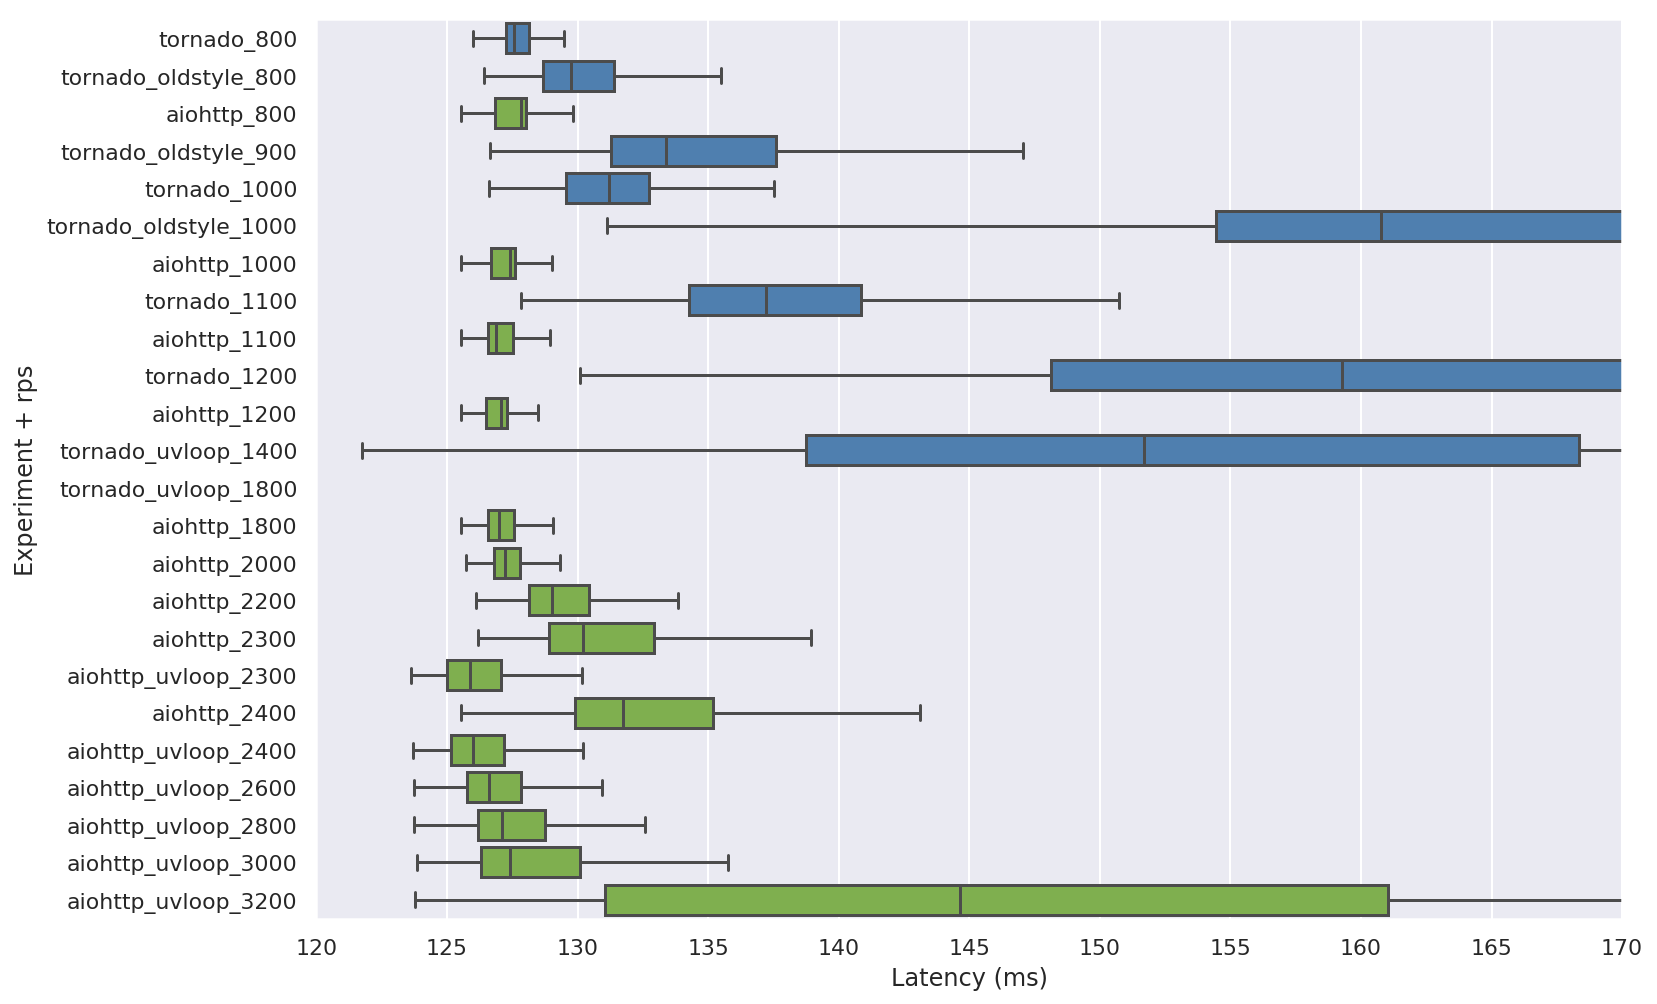

In [120]:
ax = boxplot_latency(data[data.exp_name.str.contains('hard_work')])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Experiment + rps');

In [ ]:
boxplot_latency(data[data.exp_name.str.contains('hard_work')])